In [ ]:
from google.colab import drive
import os
import shutil
from datetime import datetime
import pandas as pd
import numpy as np
import zipfile
import re
from bs4 import BeautifulSoup

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


##Preparation de donnes

In [ ]:

def select_date_file(start_date="1929-01-01", end_date="1939-12-31", source_folder="/content/data_chambre/ocr_sorted", destination_folder="/content/data/data_chambre"):

  source_folder = source_folder
  destination_folder = destination_folder
  start_date = start_date = datetime.strptime(start_date, "%Y-%m-%d")
  end_date = end_date = datetime.strptime(end_date, "%Y-%m-%d")

  os.makedirs(destination_folder, exist_ok=True)

  for file_name in os.listdir(source_folder):
    if len(file_name)>14 :
      try:
        file_date = datetime.strptime(file_name.split("_")[0], "%Y-%m-%d")
        if start_date <= file_date <= end_date:
            source_file = os.path.join(source_folder, file_name)
            destination_file = os.path.join(destination_folder, file_name)
            shutil.copy2(source_file, destination_file)
            print(f"Copied: {file_name}")
      except ValueError:
        print(f"Invalid date format in file: {file_name}")
        pass

    else:

      try:
        file_date = datetime.strptime(file_name.replace(".txt", ""), "%Y-%m-%d")
        if start_date <= file_date <= end_date:
            source_file = os.path.join(source_folder, file_name)
            destination_file = os.path.join(destination_folder, file_name)
            shutil.copy2(source_file, destination_file)
            print(f"Copied: {file_name}")
      except ValueError:
        print(f"Invalid date format in file: {file_name}")
        pass


In [ ]:
# Preprocessing
!pip install py7zr

import py7zr
import zipfile

with py7zr.SevenZipFile('/content/drive/MyDrive/Memoire_ENC/ocr_sorted.7z', 'r') as z:
      z.extractall(path='/content/data_chambre')
with zipfile.ZipFile('/content/drive/MyDrive/Memoire_ENC/data_senat.zip', 'r') as z:
    z.extractall('/content/data_senat')

select_date_file()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 602.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 3.7 MB/s eta 0:00:00
Copied: 1932-11-30.txt
Copied: 1931-11-12.txt
Copied: 1939-05-16.txt
Copied: 1931-03-28.txt
Copied: 1930-06-25.txt
Copied: 1933-01-19.txt
Copied: 1935-01-31.txt
Copied: 1934-11-24.txt
Copied: 1934-06-28.txt
Copied: 1931-06-10.txt
Copied: 1931-05-13.txt
Copied: 1936-08-01.txt
Copied: 1931-03-05.txt
Copied: 1939-03-14.txt
Copied: 1932-06-24.txt
Copied: 1936-07-23.txt
Copied: 1934-01-18.txt
Copied: 1937-06-08.txt
Copied: 1935-07-17.txt
Copied: 1930-03-27.txt
Copied: 1938-04-06.txt
Copied: 1937-05-21.txt
Copied: 1934-01-11.txt
Copied: 1934-03-31.txt
Copied: 1932-11-17.txt
Copied: 1932-12-22.txt
Copied

In [ ]:
for file_name in os.listdir('/content/data_senat'):
  match = re.search(r'date(\d{4})(\d{2})(\d{2})', file_name)
  if match:
    year, month, day = match.groups()
    formattted_date = f"{year}-{month}-{day}"
    os.rename(os.path.join('/content/data_senat', file_name), os.path.join('/content/data_senat', formattted_date + '.html'))

In [ ]:
for file_name in os.listdir('/content/data_senat'):

  os.makedirs('/content/data/data_senat', exist_ok=True)

  input_path = os.path.join('/content/data_senat', file_name)
  output_path = os.path.join('/content/data/data_senat', file_name.replace('.html', '.txt'))

  with open(input_path, 'r', encoding='utf-8') as html_file:
    html_content = html_file.read()

# User beautiful soup to parse html
  soup = BeautifulSoup(html_content, "html.parser")

  def extract_text_with_format(element):
    text = ''
    for child in element.children:
        if child.name is None:
            text += child.strip()
        elif child.name in ['span', 'strong', 'em']:
            text += child.get_text()
        else:
            text += extract_text_with_format(child) + '\n'
    return text

# extract text
  text_content = extract_text_with_format(soup.body)

# write txt
  with open(output_path, "w", encoding="utf-8") as txt_file:
    txt_file.write(text_content)

In [ ]:
df_senat = pd.DataFrame(columns=['Text', 'Date'])
df_chambre = pd.DataFrame(columns=['Text', 'Date'])

In [ ]:
for file_name in os.listdir('/content/data/data_senat'):
  with open(os.path.join('/content/data/data_senat', file_name), 'r', encoding='utf-8') as f:
    text = f.read()
    date = file_name.split('.')[0]
    df_senat = pd.concat([df_senat, pd.DataFrame({'Text': [text], 'Date': [date]})], ignore_index=True)

for file_name in os.listdir('/content/data/data_chambre'):
  with open(os.path.join('/content/data/data_chambre',file_name), 'r', encoding='utf-8') as f:
    text = f.read()
    date = file_name.split('.')[0]
    df_chambre = pd.concat([df_chambre,pd.DataFrame({'Text':[text], 'Date':[date]})],ignore_index=True)


In [ ]:
def clean_text(text):
    #remove general information of html text
    pattern = r"Le taux de reconnaissance estimé pour ce document est de \d{2}%.*"

    match = re.search(pattern, text)
    if match:
        return text[match.end():].strip()
    return text


In [ ]:
# clean text
df_senat["Text"] = df_senat["Text"].apply(clean_text)

In [ ]:
def extract_year(df):
  for date in df['Date']:
    year = date.split('-')[0]
    df.loc[df['Date'] == date, 'Year'] = year
  return df

In [ ]:
extract_year(df_senat)
extract_year(df_chambre)

,Text,Date,errors,total_words,error_positions,error_ratio,Year
0,.\n\npsommairenduPrésident.\n\n4Jr\n\ntiojiduP...,1932-11-30,3458,17309,"[0.00011554682535097349, 0.0002888670633774337...",0.199780,1932
1,.\n\nSOMMAIRE\n\n1.—Ouverturede la session ext...,1931-11-12,17307,112100,"[3.568242640499554e-05, 8.920606601248885e-05,...",0.154389,1931
2,.\n\nSOMMAIREirrocès-verbai3Décèsd'undéputé.\n...,1939-05-16,5466,39809,"[0.00010047979100203472, 0.0002009595820040694...",0.137306,1939
3,.\n\nCHAMBREDESDÉPUTÉStiel.\n\nEGISLATURE-SESS...,1931-03-28,13453,102656,"[1.9482543640897755e-05, 9.741271820448878e-05...",0.131049,1931
4,.\n\nCHAMBRE IDESDÉPUTÉSEGISLATURE-SESSIONORDI...,1930-06-25,3751,31936,"[9.3937875751503e-05, 0.000156563126252505, 0....",0.117454,1930
...,...,...,...,...,...,...,...
998,.\n\nCHAMBRE DESDÉPUTÉS15» LÉGISLATURESESSIONE...,1933-10-22,5035,35711,"[8.400772871104142e-05, 0.00014001288118506902...",0.140993,1933
999,.\n\nt\n\nGHAMBREIDESDÉPUTÉSQSS10li46eLEGISLAT...,1937-12-10,10843,78422,"[5.1006095228379794e-05, 8.926066664966464e-05...",0.138265,1937
1000,.\n\nCHAMBREDESDÉPUTÉS166 LÉGISLATURE\n\nSESSI...,1938-01-28,5986,54527,"[3.667907642085572e-05, 9.169769105213931e-05,...",0.109780,1938
1001,".\n\nSOMlrfAIR!E~~Mces.Yerbal:MM.Ducloï, le pr...",1931-11-17,8865,64914,"[3.080999476230089e-05, 9.242998428690267e-05,...",0.136565,1931


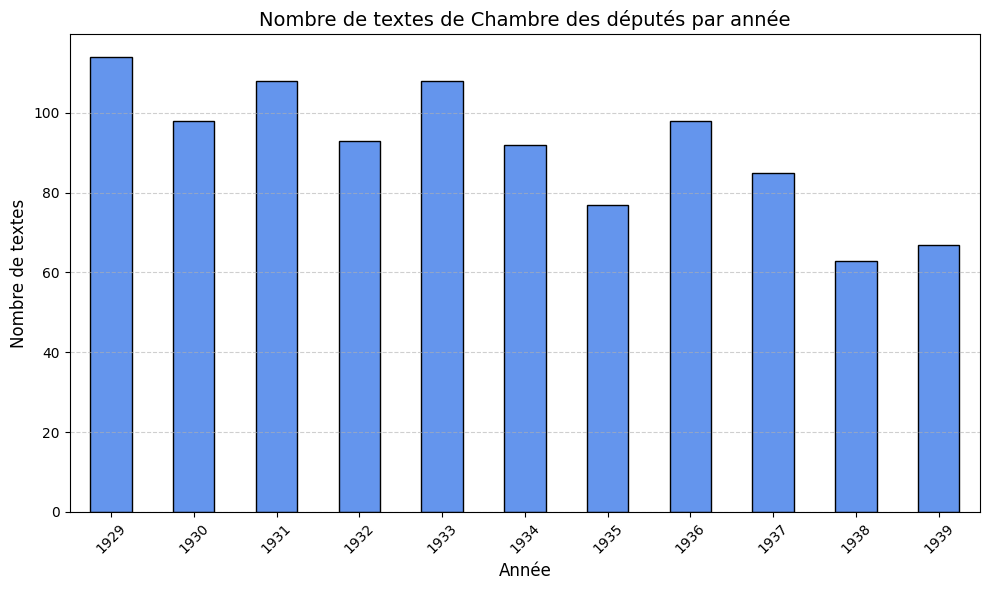

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的 DataFrame 是 df，包含 'Text' 和 'Year' 两列
# 统计每年的文本数量
year_counts = df_chambre.groupby('Year')['Text'].count().sort_index()

# 绘图
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# 法语标题和轴标签
plt.title("Nombre de textes de Chambre des députés par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de textes", fontsize=12)

# 美化图表
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


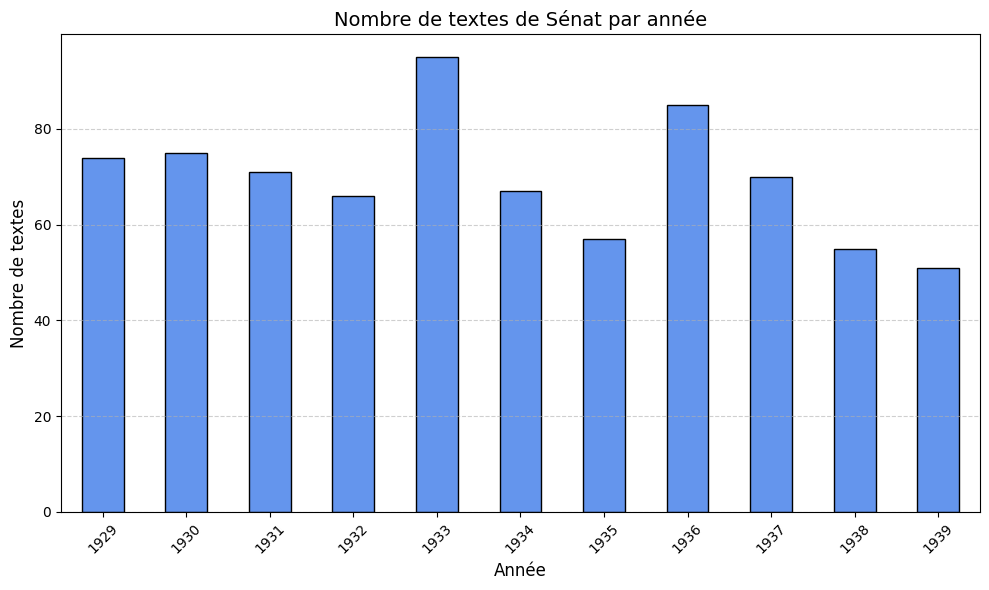

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的 DataFrame 是 df，包含 'Text' 和 'Year' 两列
# 统计每年的文本数量
year_counts = df_senat.groupby('Year')['Text'].count().sort_index()

# 绘图
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# 法语标题和轴标签
plt.title("Nombre de textes de Sénat par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de textes", fontsize=12)

# 美化图表
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
len(df_chambre)
len(df_senat)

766

In [ ]:
df_senat.to_csv('/content/drive/MyDrive/Memoire_ENC/df_senat.csv', index=False)
df_chambre.to_csv('/content/drive/MyDrive/Memoire_ENC/df_chambre.csv', index=False)

In [ ]:
def chunk_and_insert_text_optimized(df, chunk_size=256, overlap=64):
    # creat chunk text
    chunk_list = []

    for index, row in df.iterrows():
        text = row['Text']
        date = row['Date']
        year = row['Year']

        # Tokenize the text by splitting on whitespace
        tokens = text.split()
        for i in range(0, len(tokens), chunk_size - overlap):
            chunk = tokens[i:i + chunk_size]
            if len(chunk) == chunk_size:

                chunk_list.append({
                    'chunk': " ".join(chunk),
                    'date': date,
                    'year': year
                })

    new_df = pd.DataFrame(chunk_list)
    return new_df


In [ ]:
chunked_df_senat = chunk_and_insert_text_optimized(df_senat)
chunked_df_chambre = chunk_and_insert_text_optimized(df_chambre)

In [ ]:
chunked_df_senat

,chunk,date,year
0,tes1j.~~ï*edela séance figureafinduprésentcomp...,1929-07-31,1929
1,ne pouvoir assister à la séance de ce jour. — ...,1929-07-31,1929
2,"matériels et moraux, dans le monde. Il nous se...",1929-07-31,1929
3,gouvernement depuis la fin de la guerre. Avec ...,1929-07-31,1929
4,"vous prie de vouloir bien saisirjlfi..éDa!.,- ...",1929-07-31,1929
...,...,...,...
216110,l'instruction publique à quelle date aura lieu...,1929-07-04,1929
216111,adhérents victimes d'accidents du travail et a...,1929-07-04,1929
216112,corps d'officiers d'administration des service...,1929-07-04,1929
216113,"collègues,portantins""*juge unique dans lestrib...",1929-07-04,1929


In [ ]:
chunked_df_senat.to_csv('/content/drive/MyDrive/Memoire_ENC/chunked_df_senat.csv', index=False)
chunked_df_chambre.to_csv('/content/drive/MyDrive/Memoire_ENC/chunked_df_chambre.csv', index=False)

##Error distribution

In [ ]:
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


In [ ]:
! python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 57.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:


nlp = spacy.load("fr_core_news_sm", disable=["parser", "ner", "tagger"])
nlp.max_length = 2000000  


def detect_errors_with_positions(text, max_word_length=15):
    doc = nlp(text)
    total_words = len(doc)
    errors = 0
    error_positions = []  # 用于记录错误的归一化位置

    for i, token in enumerate(doc):
        # 跳过标点符号和空白字符
        if token.is_punct or token.is_space:
            continue

        # 检查是否为错误单词
        if (len(token.text) > max_word_length or
            not re.match(r"^[a-zA-ZÀ-ÖØ-öø-ÿ\-']+$", token.text) or
            not token.is_alpha):
            errors += 1
            # 记录错误的归一化位置
            error_positions.append(i / total_words)

    return errors, total_words, error_positions

def process_texts(texts):
    results = []
    for doc in tqdm(nlp.pipe(texts, batch_size=10), total=len(texts)):
        errors, total_words, error_positions = detect_errors_with_positions(doc.text)
        results.append((errors, total_words, error_positions))
    return results

In [ ]:
#Results from df_chambre

100%|██████████| 1003/1003 [2:08:54<00:00,  7.71s/it]

                                                   Text  error_ratio
0     .\n\nSOMMAIRE 1. - Ouverture de la session ext...     0.112708
1     .\n\nCHAMBREDESDÉPUTÉS*Législature— SESSION OR...     0.176214
2     .\n\n*\n\nDÉBATSPARLEMENTAIRES N° 95\n\nt\n\nC...     0.124182
3     .\n\nCHAMBREDESDÉPUTÉSttss16° LÉGISLATURESlOîs...     0.145087
4     .\n\nCHAMBREDESDÉPUTÉS14e LÉGISLATURE - SESSIO...     0.145087
...                                                 ...          ...
998   .\n\n*\n\nCHAMBREIDES DÉPUTÉStvGISLATURE—SESSI...     0.144071
999   .\n\nDÉBATSPARLEMENTAIRESIV3\n\nCHAMBRE DESDÉP...     0.145844
1000  .\n\nCHAMBRESESDÉPUTÉS1-'eLEGISLATURESESSIONEX...     0.099676
1001  .\n\nghambreDESdéputés14e LÉGISLATURE - SESSIO...     0.127049
1002  .\n\nDEBATSPARLEMENTAIRES\n\nN° 89\n\nCHAMBREI...     0.156161

[1003 rows x 2 columns]
Overall error ratio: 13.35%


In [ ]:
results_chambre = process_texts(df_chambre['Text'])

df_chambre['errors'], df_chambre['total_words'], df_chambre['error_positions'] = zip(*results_chambre)


df_chambre['error_ratio'] = df_chambre['errors'] / df_chambre['total_words']


total_errors = df_chambre['errors'].sum()
total_words = df_chambre['total_words'].sum()
overall_error_ratio = total_errors / total_words



print(df_chambre[['Text', 'error_ratio']])
print(f"Overall error ratio: {overall_error_ratio:.2%}")

100%|██████████| 1003/1003 [3:22:38<00:00, 12.12s/it]

                                                   Text  error_ratio
0     .\n\npsommairenduPrésident.\n\n4Jr\n\ntiojiduP...     0.199780
1     .\n\nSOMMAIRE\n\n1.—Ouverturede la session ext...     0.154389
2     .\n\nSOMMAIREirrocès-verbai3Décèsd'undéputé.\n...     0.137306
3     .\n\nCHAMBREDESDÉPUTÉStiel.\n\nEGISLATURE-SESS...     0.131049
4     .\n\nCHAMBRE IDESDÉPUTÉSEGISLATURE-SESSIONORDI...     0.117454
...                                                 ...          ...
998   .\n\nCHAMBRE DESDÉPUTÉS15» LÉGISLATURESESSIONE...     0.140993
999   .\n\nt\n\nGHAMBREIDESDÉPUTÉSQSS10li46eLEGISLAT...     0.138265
1000  .\n\nCHAMBREDESDÉPUTÉS166 LÉGISLATURE\n\nSESSI...     0.109780
1001  .\n\nSOMlrfAIR!E~~Mces.Yerbal:MM.Ducloï, le pr...     0.136565
1002  .\n\nCHAMBRE DES DÉPUTÉS 14' LËGISLATURE - SES...     0.087109

[1003 rows x 2 columns]
Overall error ratio: 13.35%


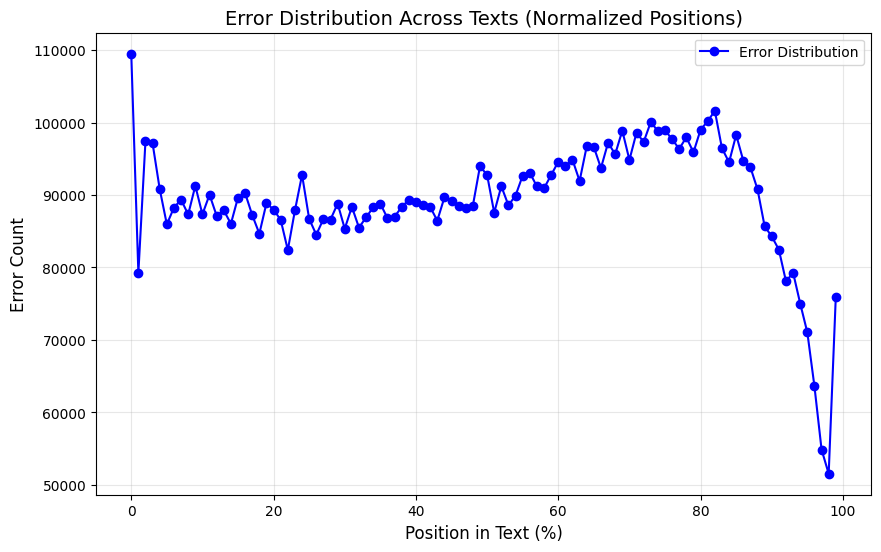

In [ ]:

all_error_positions = [pos for positions in df_chambre['error_positions'] for pos in positions]


bins = np.linspace(0, 1, 101) 
hist, _ = np.histogram(all_error_positions, bins=bins)


plt.figure(figsize=(10, 6))
plt.plot(bins[:-1] * 100, hist, marker='o', linestyle='-', color='b', label='Distribution des erreurs')
plt.title("Error Distribution Across Texts (Normalized Positions)", fontsize=14)
plt.xlabel("Position in Text (%)", fontsize=12)
plt.ylabel("Error Count", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

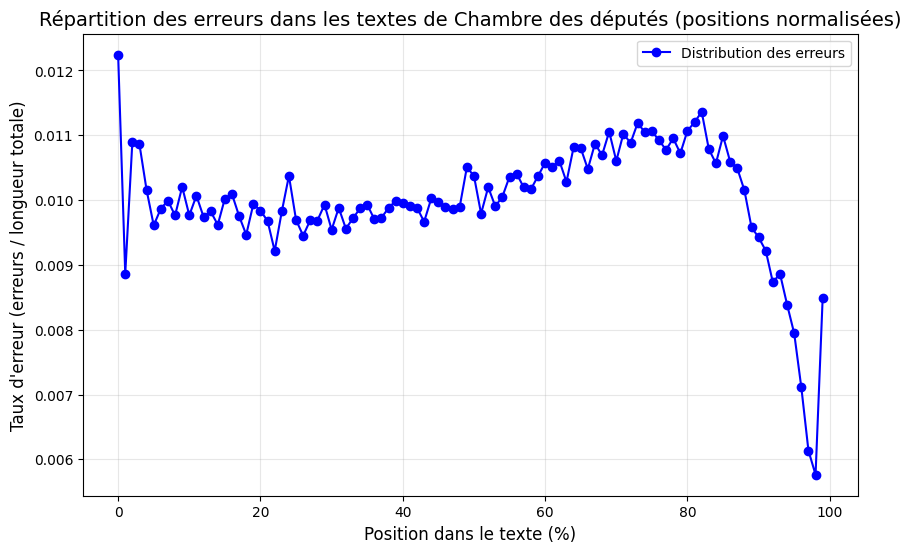

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


all_error_positions = [pos for positions in df_chambre['error_positions'] for pos in positions]


bins = np.linspace(0, 1, 101)  
hist, _ = np.histogram(all_error_positions, bins=bins)


total_length = len(all_error_positions) 


error_ratio = hist / total_length

plt.figure(figsize=(10, 6))
plt.plot(bins[:-1] * 100, error_ratio, marker='o', linestyle='-', color='b', label='Distribution des erreurs')
plt.title("Répartition des erreurs dans les textes de Chambre des députés (positions normalisées)", fontsize=14)
plt.xlabel("Position dans le texte (%)", fontsize=12)
plt.ylabel("Taux d'erreur (erreurs / longueur totale)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
results_senat = process_texts(df_senat['Text'])

df_senat['errors'], df_senat['total_words'], df_senat['error_positions'] = zip(*results_senat)


df_senat['error_ratio'] = df_senat['errors'] / df_senat['total_words']


total_errors = df_senat['errors'].sum()
total_words = df_senat['total_words'].sum()
overall_error_ratio = total_errors / total_words


print(df_senat[['Text', 'error_ratio']])
print(f"Overall error ratio: {overall_error_ratio:.2%}")

100%|██████████| 766/766 [1:14:24<00:00,  5.83s/it]

                                                  Text  error_ratio
0    Ce numéro comprend également le compte rendu d...     0.122666
1    Cenumérocomprend également le compte rendu de ...     0.161796
2    Ce numéro comprend également le compte rendu d...     0.121136
3    Cenumérocomprendégalement le compte rendu de l...     0.139472
4    S 3Ë2 HNT-A^T\nSI¡:SSIONEXTRAORDINAIRE DE 1.93...     0.123684
..                                                 ...          ...
761  Rappel de votre demande:\n\nFormat de téléchar...     0.133946
762  Ce numéro comprend également le compte rendu d...     0.082220
763  Cenumérocomprend également la compte rendu de ...     0.149494
764  IeSommairede cette séancefigureàlafin du prése...     0.136354
765  Cenumérocomprendégalement le compte rendu de l...     0.140708

[766 rows x 2 columns]
Overall error ratio: 13.16%


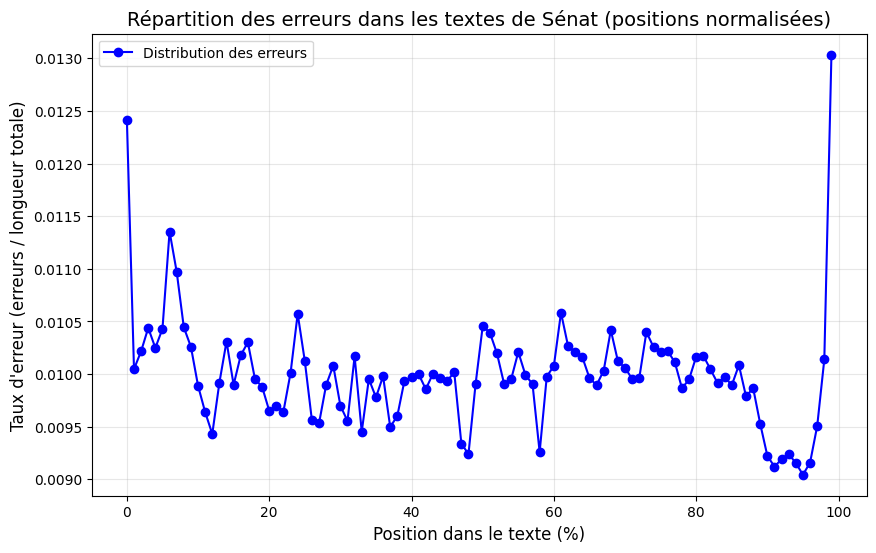

In [ ]:


all_error_positions = [pos for positions in df_senat['error_positions'] for pos in positions]

bins = np.linspace(0, 1, 101)  
hist, _ = np.histogram(all_error_positions, bins=bins)


total_length = len(all_error_positions) 


error_ratio = hist / total_length

plt.figure(figsize=(10, 6))
plt.plot(bins[:-1] * 100, error_ratio, marker='o', linestyle='-', color='b', label='Distribution des erreurs')
plt.title("Répartition des erreurs dans les textes de Sénat (positions normalisées)", fontsize=14)
plt.xlabel("Position dans le texte (%)", fontsize=12)
plt.ylabel("Taux d'erreur (erreurs / longueur totale)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
df_senat.to_csv('/content/drive/MyDrive/Memoire_ENC/df_senat_error.csv', index=False)